In [1]:
import json
import sys
from train_cnfqi import run
import seaborn as sns
import tqdm
import matplotlib.pyplot as plt 
import numpy as np

# Force_left vs success

In [2]:
c_success = []
f_success = []
for j in range(5):
    cfqi_success = []
    fqi_success = []
    for i in range(0, 10, 2):
        print(str(j) + " " + str(i))
        success, total, nfq_agent = run(verbose=False, is_contrastive=True, evaluations=10, force_left=i)
        cfqi_success.append(success/total)
        success, total, nfq_agent = run(verbose=False, is_contrastive=False, evaluations=10, force_left=i)
        fqi_success.append(success/total)
    c_success.append(cfqi_success)
    f_success.append(fqi_success)      

0 0


/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


0 2
0 4
0 6
0 8
1 0
1 2
1 4
1 6
1 8
2 0
2 2
2 4
2 6
2 8
3 0
3 2
3 4
3 6
3 8
4 0
4 2
4 4
4 6
4 8


/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/amandyam/.conda/envs/research/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Percentage of runs that were successful')

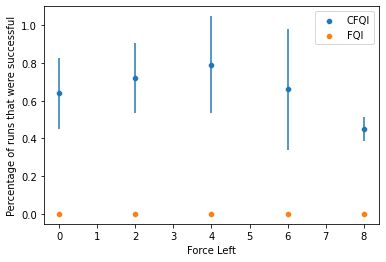

In [3]:
c_success = np.asarray(c_success)
c_mean = np.mean(c_success, axis=0)
c_std = np.std(c_success, axis=0)
f_success = np.asarray(f_success)
f_mean = np.mean(f_success, axis=0)
f_std = np.std(f_success, axis=0)
x = [i for i in range(0, 10, 2)]
sns.scatterplot(x, c_mean, label='CFQI')
plt.errorbar(x, c_mean ,yerr=c_std, linestyle="None")
sns.scatterplot(x, f_mean, label='FQI')
plt.errorbar(x, f_mean ,yerr=f_std, linestyle="None")
plt.xlabel("Force Left")
plt.ylabel("Percentage of runs that were successful")

# Interpretability

In [ ]:
# Foreground group
heatmap = []
for pos in range(-10, 11, 1):
    pos /= 10
    pos_values = []
    vel = 0
    ang = -4
    p_vel = 0
    state = np.asarray([pos, vel, ang, p_vel])
    best_action = nfq_agent.get_best_action(state, np.array([0, 1]), 1)
    pos_values.append(best_action)
    
    heatmap.append(pos_values)
    
heatmap = np.asarray(heatmap)
xticklabels = [x/10 for x in range(-10, 10, 1)]
yticklabels = [-4]
ax = plt.figure(figsize=(10, 2))
sns.heatmap(heatmap.T, xticklabels=xticklabels, yticklabels=yticklabels)
plt.title("Foreground")
plt.xlabel("Cart Position")
plt.ylabel("Pole Angle")

In [ ]:
# Background group
heatmap = []
for pos in range(-10, 11, 1):
    pos /= 10
    pos_values = []
    vel = 0
    ang = -4
    p_vel = 0
    state = np.asarray([pos, vel, ang, p_vel])
    best_action = nfq_agent.get_best_action(state, np.array([0, 1]), 0)
    pos_values.append(best_action)
    
    heatmap.append(pos_values)
heatmap = np.asarray(heatmap)
xticklabels = [x/10 for x in range(-10, 10, 1)]
yticklabels = [-4]
ax = plt.figure(figsize=(10, 2))
sns.heatmap(heatmap.T, xticklabels=xticklabels, yticklabels=yticklabels)
plt.title("Background")
plt.xlabel("Cart Position")
plt.ylabel("Pole Angle")

In [ ]:
nfq_agent._nfq_net.layers_fg

In [ ]:
nc_success = []
c_success = []
for i in range(10):
    print(str(i))
    success, total = run(verbose=False, is_contrastive=False, evaluations=5)
    nc_success.append(success/total)
    
    success, total = run(verbose=False, is_contrastive=True, evaluations=5)
    c_success.append(success/total)

In [ ]:
ax = sns.boxplot(x=nc_success)
sns.swarmplot(nc_success, label='FQI', color='.25')

In [ ]:
ax = sns.boxplot(x=c_success)
sns.swarmplot(c_success, label='CFQI', color='.25')

In [ ]:
plt.ylabel("Percentage of evaluations that were successful")
plt.boxplot(x=[nc_success, c_success], labels=['FQI', 'CFQI'])